In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

print('setup completed')

setup completed


# Data Cleaning

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/spotify_2023.csv'
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
df.describe()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
df.isna().sum()
df.dtypes

,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,object
in_apple_playlists,int64


In [ ]:
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors = 'coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors = 'coerce')
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')
df.dtypes
df.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0


In [ ]:
df.loc[df['streams'].isna()]
df = df.drop(574).reset_index(drop=True)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


# EDA



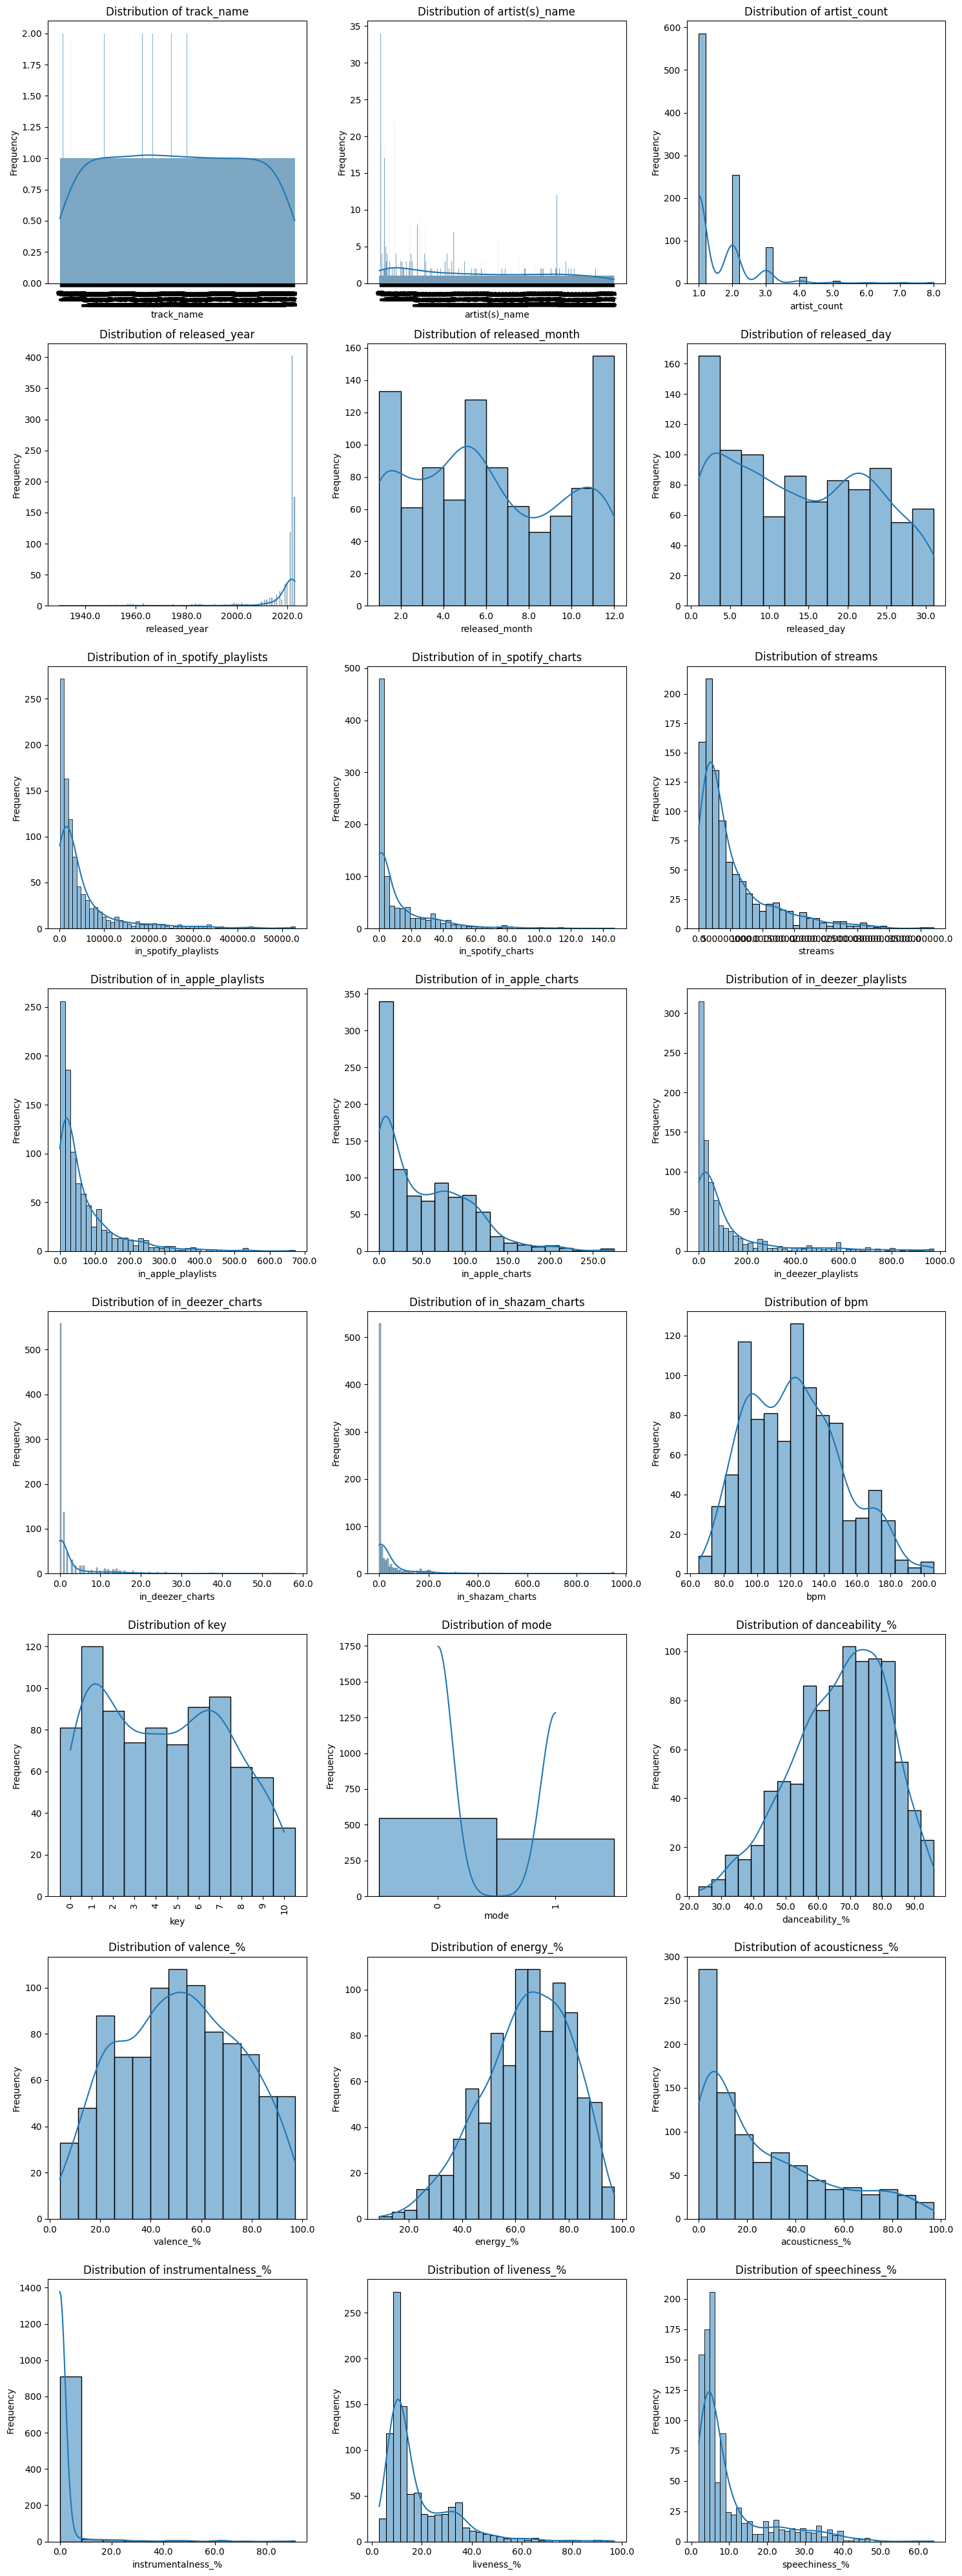

In [ ]:
num_vars = len(df.columns)
cols = 3
rows = (num_vars//cols) + (num_vars%cols >0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
axes = axes.flatten()
for i, col in enumerate(df.columns):
  sns.histplot( df[col], ax = axes[i], kde = True)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_ylabel('Frequency')
  if df[col].dtype == 'object':
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)
  else:
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=0)
  plt.tight_layout()
plt.show()

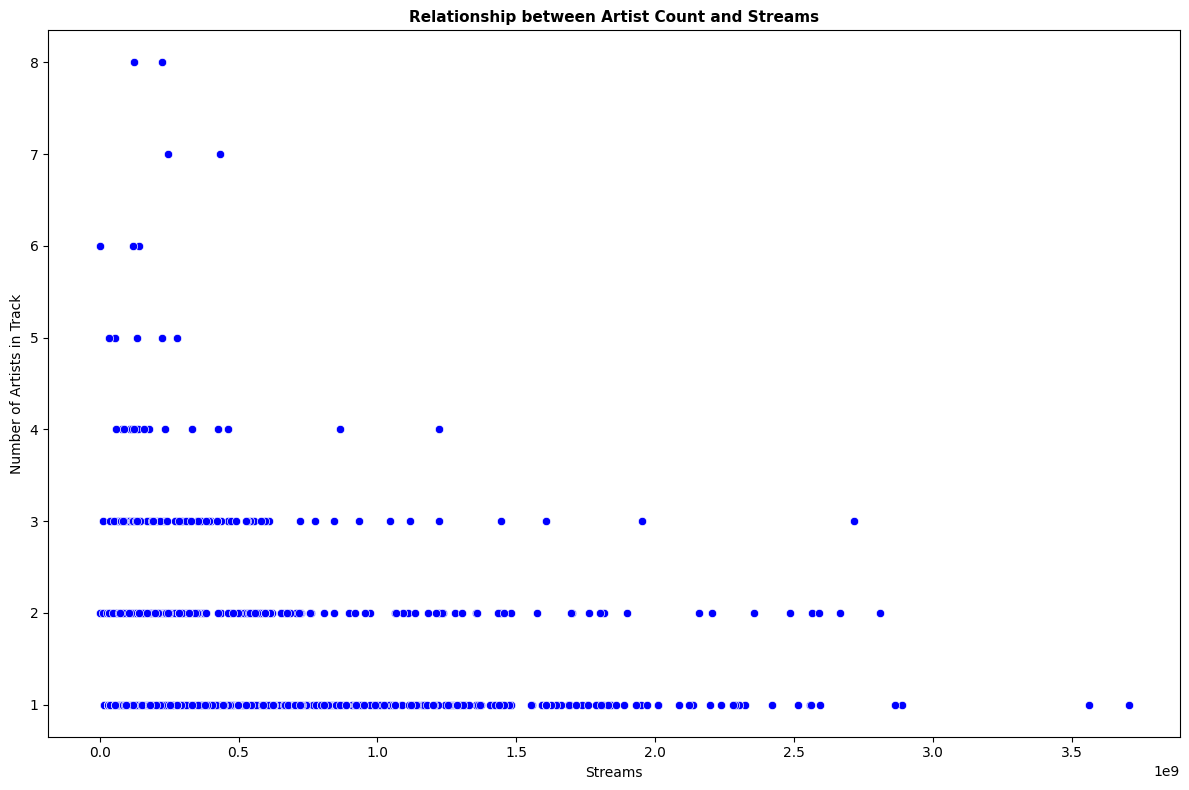

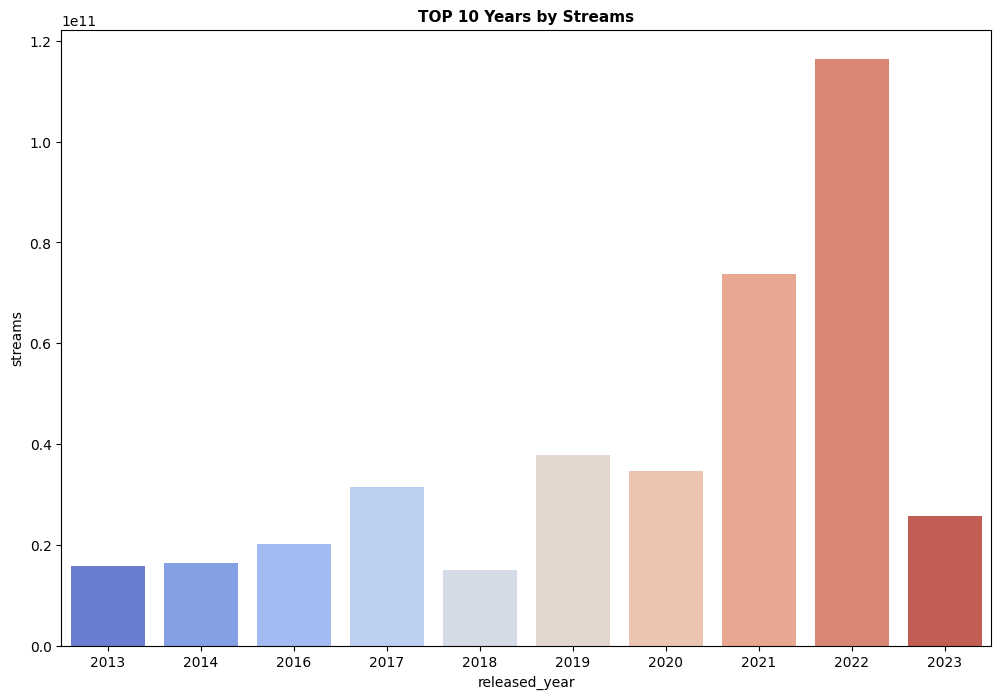

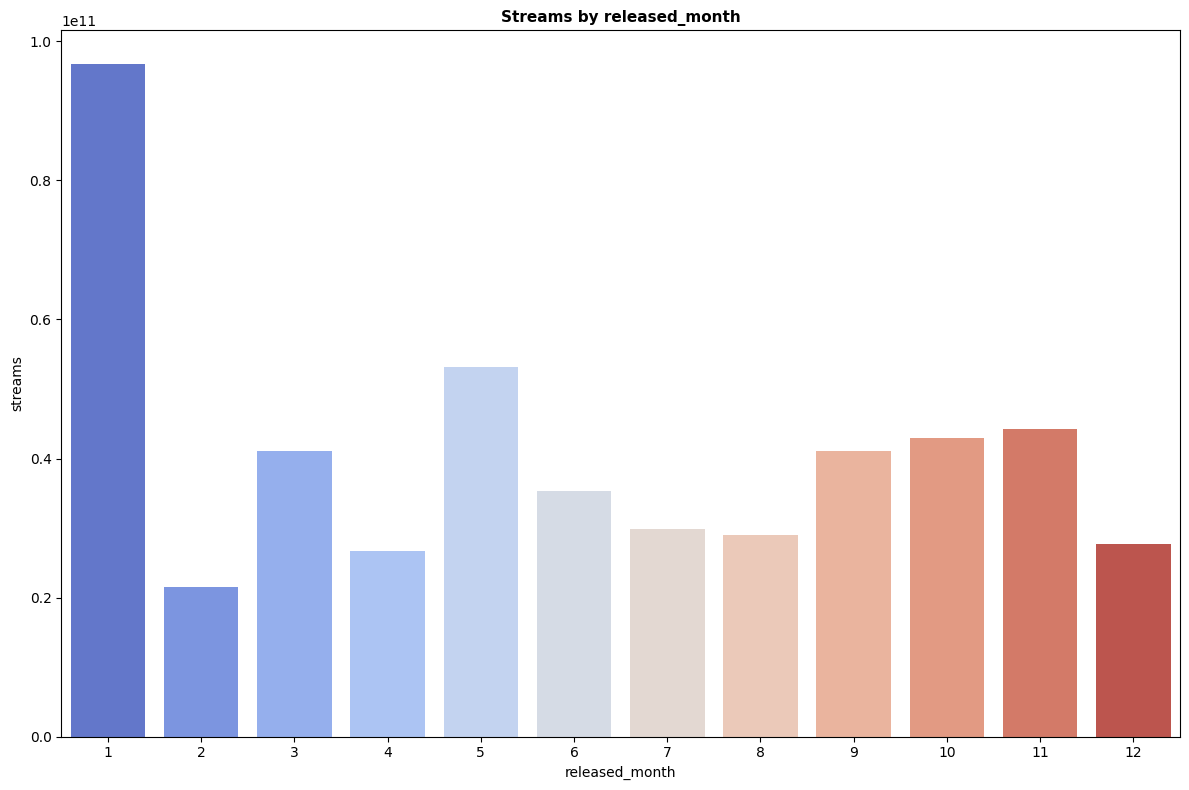

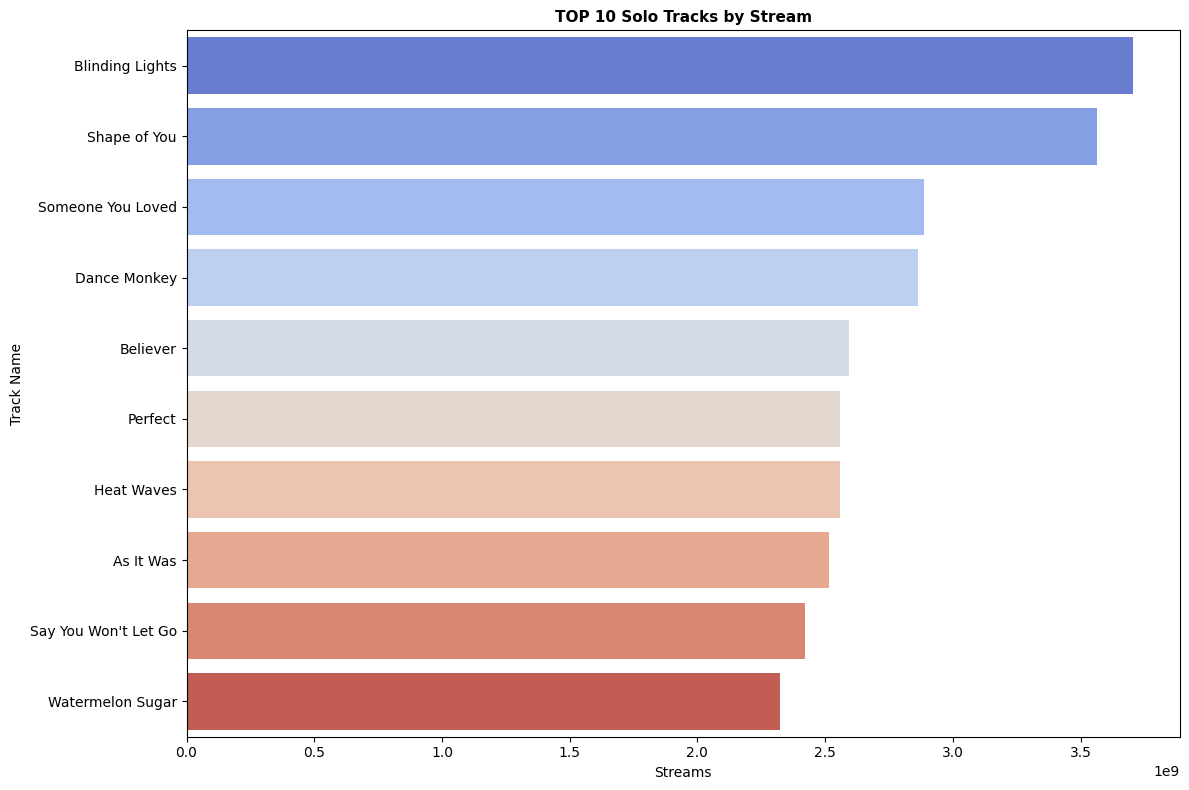

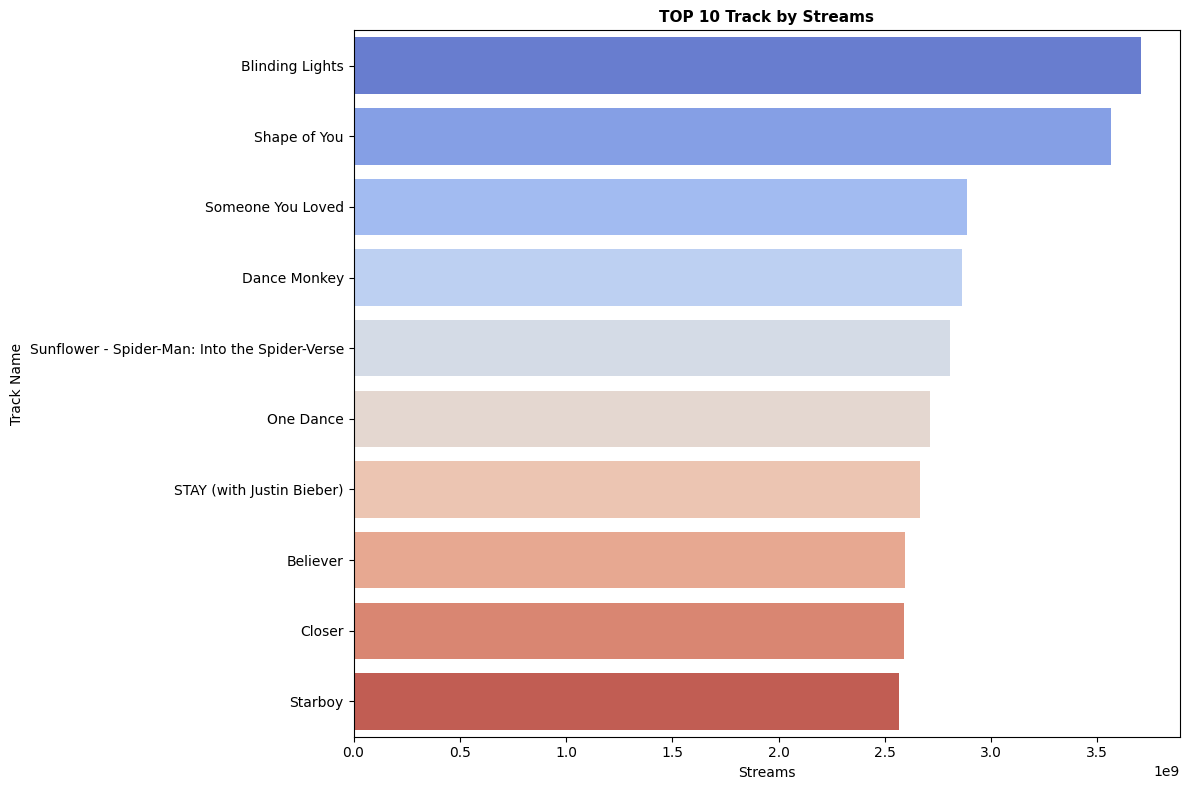

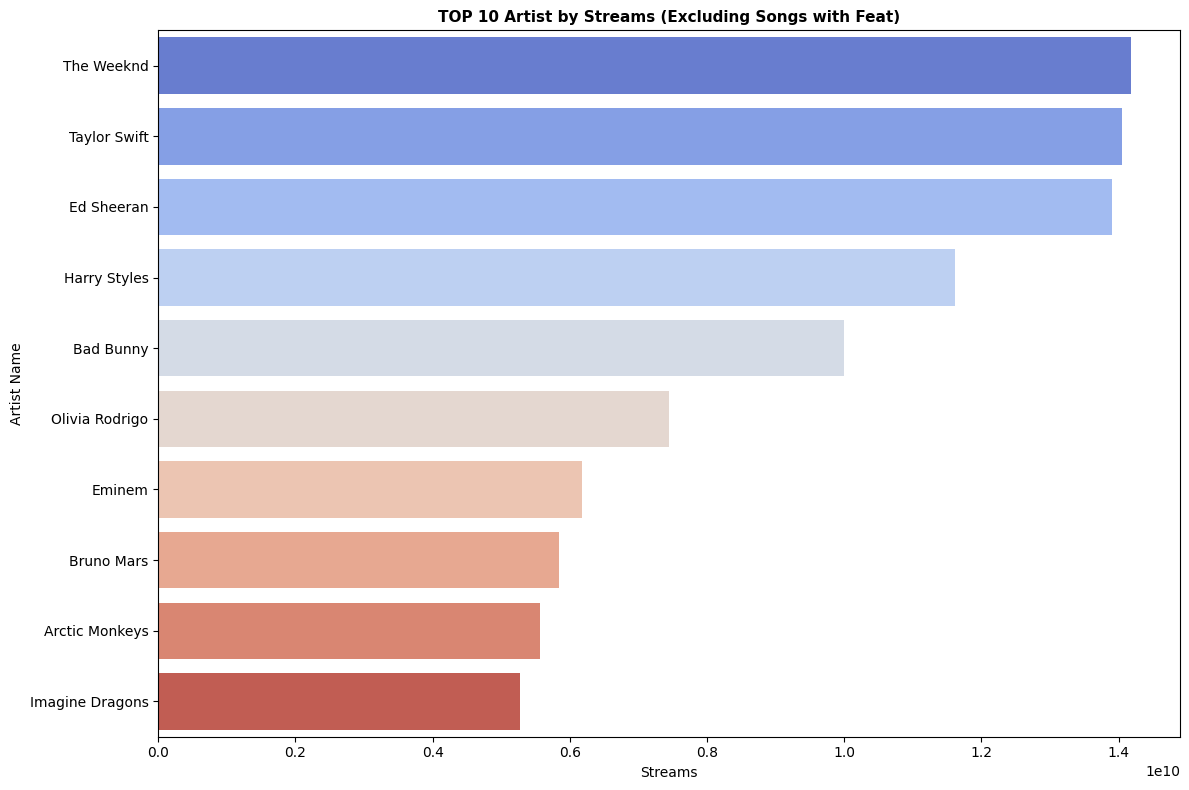

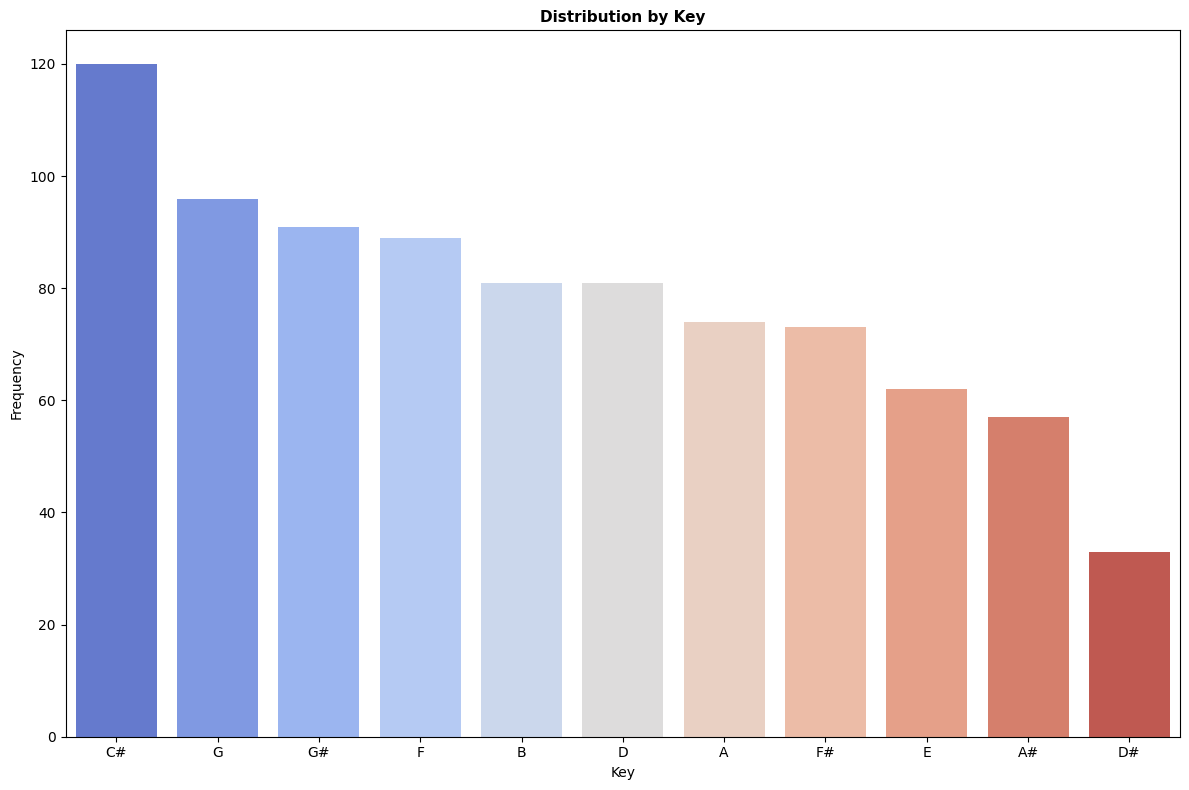

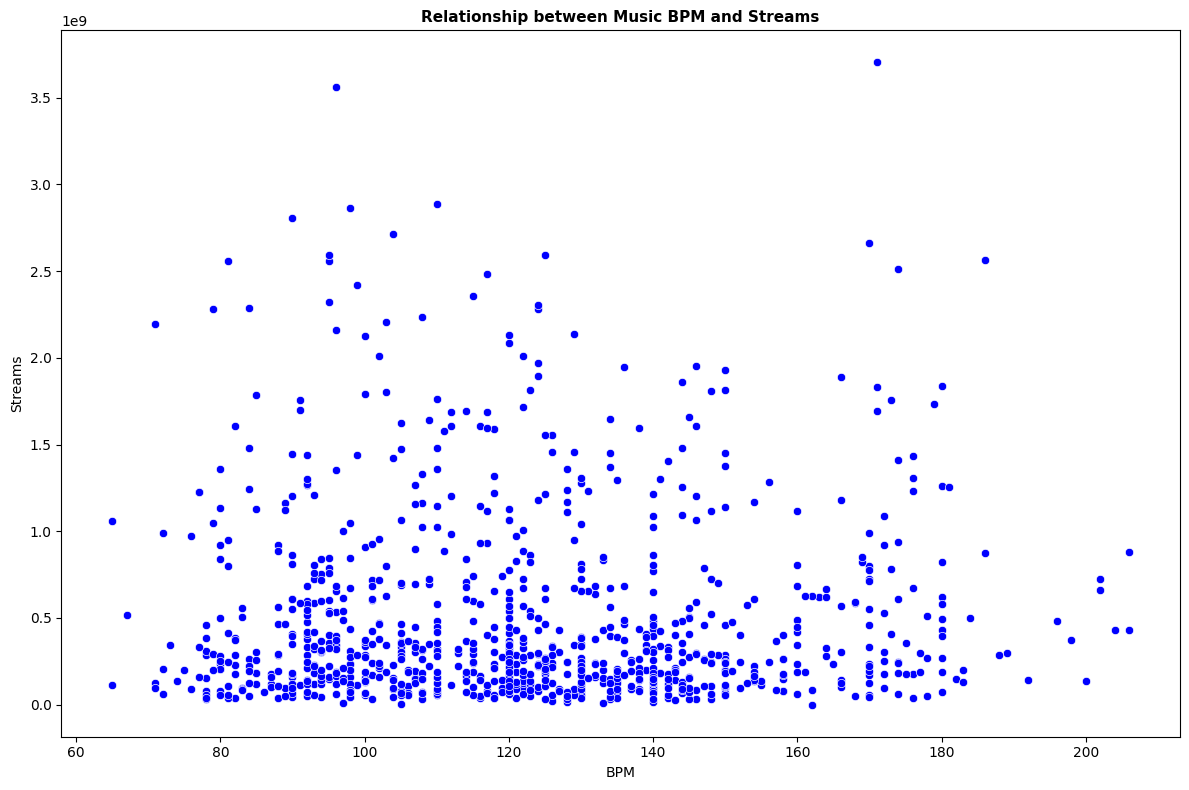

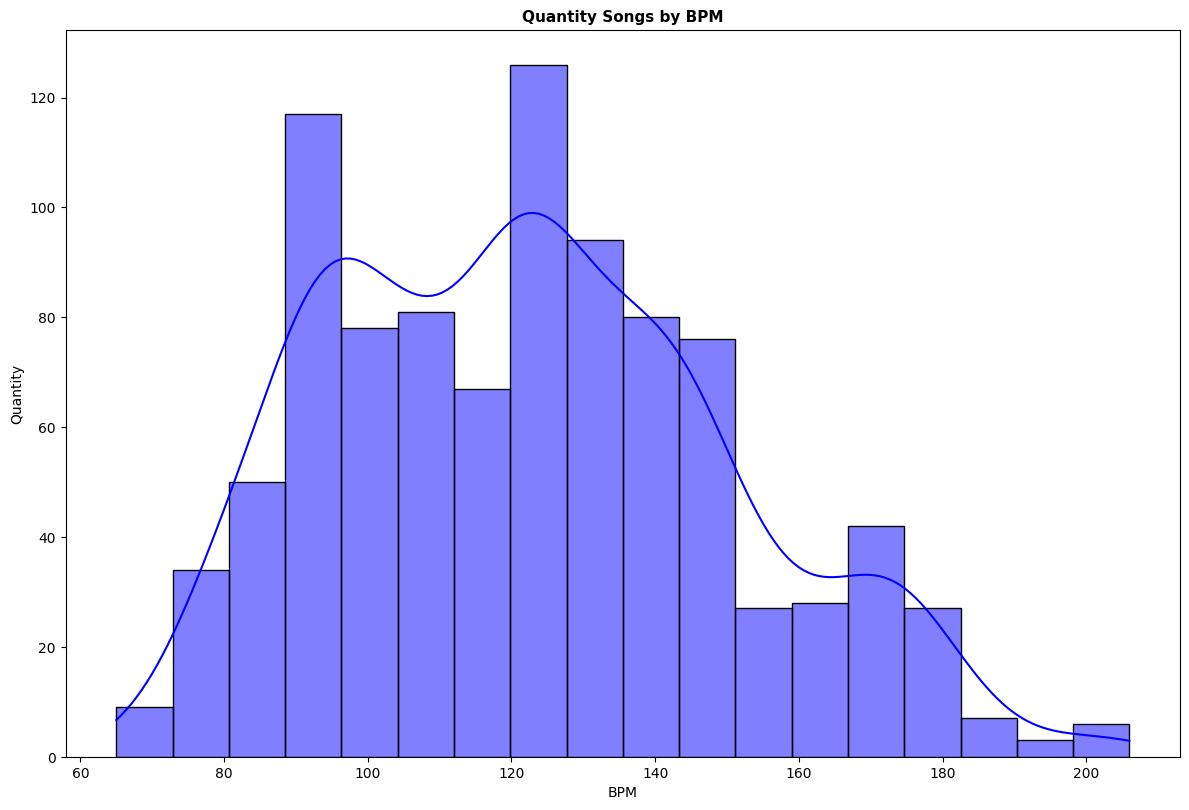

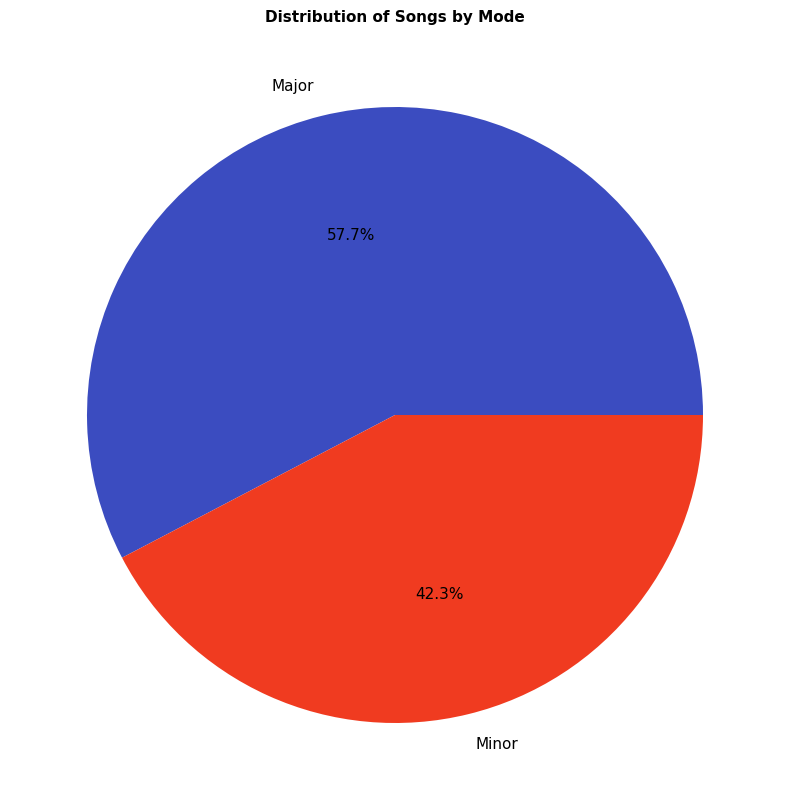

In [ ]:
#Graphic 1
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df,
    x = 'streams',
    y = 'artist_count',
    color = 'blue'
)
plt.title('Relationship between Artist Count and Streams', size = 11, fontweight = 'bold')
plt.xlabel('Streams')
plt.ylabel('Number of Artists in Track')
plt.tight_layout()
plt.show()

#Graphic 2 and 3
data1 = ['released_year', 'released_month']
for i, col, in enumerate(data1):
  df_grouped = df.groupby(col)['streams'].sum().reset_index().sort_values(by = 'streams', ascending = False)
  plt.figure(figsize=(12,8))
  if col == 'released_year':
    df_grouped = df_grouped.head(10)
  else:
    df_grouped = df_grouped
  sns.barplot(
      x = df_grouped[col],
      y = df_grouped['streams'],
      errorbar = None,
      palette = 'coolwarm'
  )
  if col == 'released_year':
    plt.title('TOP 10 Years by Streams', size = 11, fontweight = 'bold')
  else:
    plt.title(f'Streams by {col}', size = 11, fontweight = 'bold')
plt.tight_layout()
plt.show()

#Graphic 4
df_1artist = df[df['artist_count']==1]
df_1artist_grouped = df_1artist.groupby('track_name')['streams'].sum().reset_index().sort_values(by='streams', ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(
    data = df_1artist_grouped.head(10),
    y = 'track_name',
    x = 'streams',
    errorbar = None,
    palette = 'coolwarm'
)
plt.title('TOP 10 Solo Tracks by Stream', size = 11, fontweight = 'bold')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()

#Graphic 5
df_topsongs = df.groupby('track_name')['streams'].sum().reset_index().sort_values(by='streams', ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(
    data = df_topsongs.head(10),
    y = 'track_name',
    x = 'streams',
    errorbar = None,
    palette = 'coolwarm'
)
plt.title('TOP 10 Track by Streams', size = 11, fontweight = 'bold')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.tight_layout()
plt.show()

#Graphic 6
df_1artist_grouped_streams = df_1artist.groupby('artist(s)_name')['streams'].sum().reset_index().sort_values(by='streams', ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(
    data = df_1artist_grouped_streams.head(10),
    y = 'artist(s)_name',
    x = 'streams',
    errorbar = None,
    palette = 'coolwarm'
)
plt.title('TOP 10 Artist by Streams (Excluding Songs with Feat)', size = 11, fontweight = 'bold')
plt.xlabel('Streams')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

#Graphic 7
plt.figure(figsize = (12,8))
sns.countplot(
    data = df,
    x = 'key',
    palette = 'coolwarm',
    order = df['key'].value_counts().sort_values(ascending = False).index
)
plt.title('Distribution by Key', size = 11, fontweight = 'bold')
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Graphic 8
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df,
    x = 'bpm',
    y = 'streams',
    color = 'blue'
)
plt.title('Relationship between Music BPM and Streams', size = 11, fontweight = 'bold')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

#graphic 9
plt.figure(figsize=(12,8))
sns.histplot(
    data = df,
    x = 'bpm',
    palette = 'coolwarm',
    color = 'blue',
    kde = True
)
plt.tight_layout()
plt.title('Quantity Songs by BPM', size =11, fontweight = 'bold')
plt.xlabel('BPM')
plt.ylabel('Quantity')
plt.show()

#graphic 10
plt.figure(figsize=(12,8))
mode_counts = df['mode'].value_counts()
plt.pie(
    x = mode_counts.values,
    labels = mode_counts.index,
    autopct = '%1.1f%%',
    colors = ['#3b4cc0','#f03b20'],
    textprops = {'size' :'11', 'fontweight' : 'light'}
)
plt.tight_layout()
plt.title('Distribution of Songs by Mode', size =11, fontweight = 'bold')
plt.show()

# Correlation

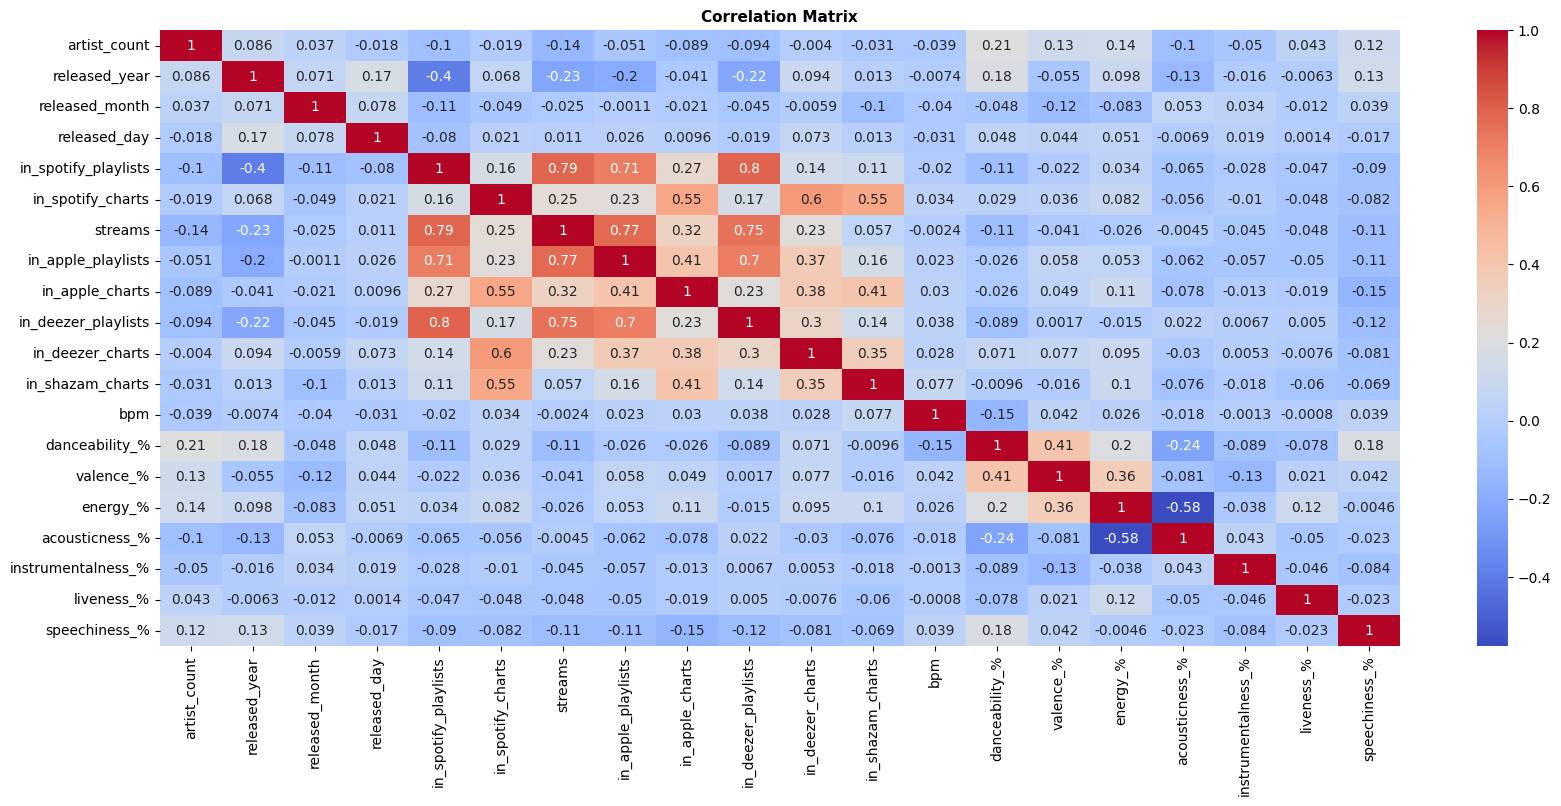

In [ ]:
num_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20,8))
sns.heatmap(
    num_columns.corr(),
    annot = True,
    cmap = 'coolwarm'
)
plt.title('Correlation Matrix', size = 11, fontweight = 'bold')
plt.show()